In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
import statsmodels.api as sm
from scipy import stats, special
from scipy.stats import norm, f_oneway, linregress
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
import statsmodels.formula.api as smf

### Note: When to use = or ==?
Use '=' for assignment, i.e., when you want to assign a value to a variable.
Use '==' for comparison, i.e., when you want to check if two values are equal.
Examples:

x = 5 assigns the value 5 to the variable x.
x == 5 checks if the value of x is equal to 5 and returns a Boolean (True or False) result.

In [41]:
import pandas as pd

# Define the value that should be treated as NaN
na_values = [0]

df = pd.read_excel('telecom_users.xlsx', usecols=lambda col: col not in ["name"], na_values=na_values)
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Provider,Age
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,NaN,NaN
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No,NaN,NaN
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,NaN,NaN
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No,NaN,NaN
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.5,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes,NaN,NaN
6046,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No,NaN,NaN
6047,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,NaN,NaN
6048,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,NaN,NaN


In [6]:
# See all the columns
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Provider', 'Age'],
      dtype='object')

In [42]:
# Exclude "Age" and "Provider" columns
df = df.drop(["Age", "Provider"], axis=1)
df
# Now, 'df' contains all columns except "Age" and "Provider"

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
6046,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
6047,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
6048,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [43]:
# Sort the DataFrame by the "Unnamed: 0" column in ascending order
df.sort_values(by='Unnamed: 0', inplace=True)

# Set the sorted "Unnamed: 0" column as the index and remove the index name
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None  # Remove the index name

# Display the updated DataFrame
df.head()  # Use df.head() to display the first few rows of the updated DataFrame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Scenario 1: Total Male Subscribers (not Senior Citizens) # 2,591
male_not_senior = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 0)]
male_not_senior

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No


In [10]:
# a. Phone Service
male_not_senior_phone = male_not_senior['PhoneService'].value_counts()
male_not_senior_phone

Yes    2336
No      255
Name: PhoneService, dtype: int64

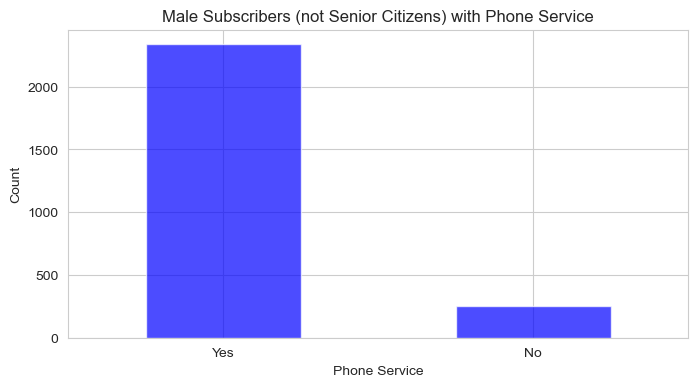

In [11]:
# Bar chart for Male Subscribers (not Senior Citizens) with Phone Service
plt.figure(figsize=(8, 4))
male_not_senior_phone.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Male Subscribers (not Senior Citizens) with Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
# b. Internet Service
male_not_senior_internet = male_not_senior['InternetService'].value_counts()
male_not_senior_internet

Fiber optic    988
DSL            959
No             644
Name: InternetService, dtype: int64

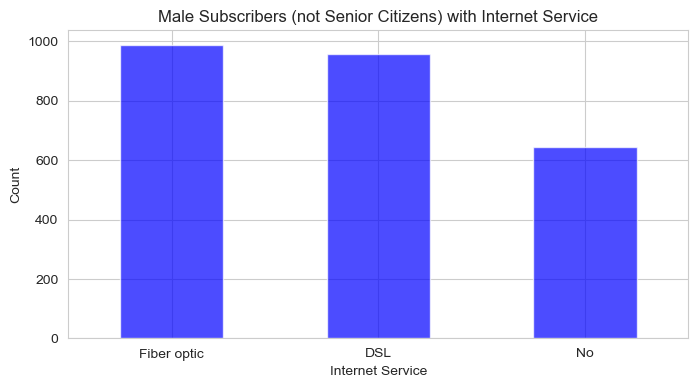

In [13]:
plt.figure(figsize=(8, 4))
male_not_senior_internet.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Male Subscribers (not Senior Citizens) with Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [15]:
# c. Device Protection
male_not_senior_device = male_not_senior['DeviceProtection'].value_counts()
male_not_senior_device

No                     1089
Yes                     858
No internet service     644
Name: DeviceProtection, dtype: int64

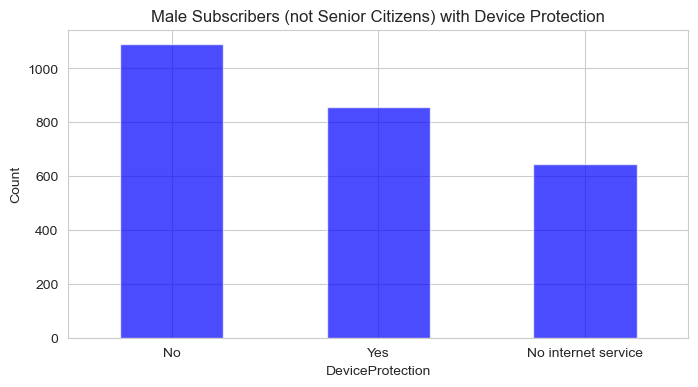

In [16]:
plt.figure(figsize=(8, 4))
male_not_senior_device.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Male Subscribers (not Senior Citizens) with Device Protection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [17]:
# d. Streaming TV
male_not_senior_streaming = male_not_senior['StreamingTV'].value_counts()
male_not_senior_streaming

No                     1014
Yes                     933
No internet service     644
Name: StreamingTV, dtype: int64

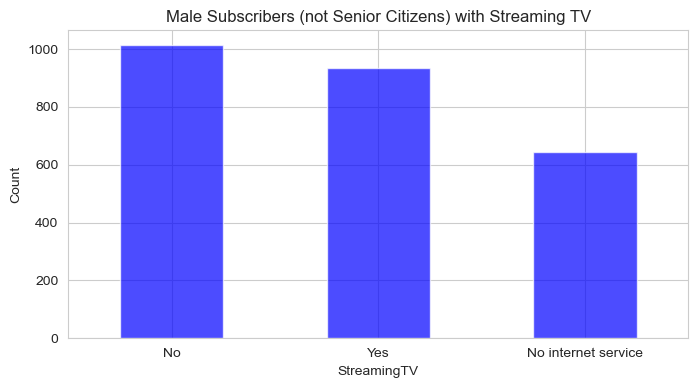

In [18]:
plt.figure(figsize=(8, 4))
male_not_senior_streaming.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Male Subscribers (not Senior Citizens) with Streaming TV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [20]:
# e. Paperless billing
male_not_senior_paperless = male_not_senior['PaperlessBilling'].value_counts()
male_not_senior_paperless

Yes    1424
No     1167
Name: PaperlessBilling, dtype: int64

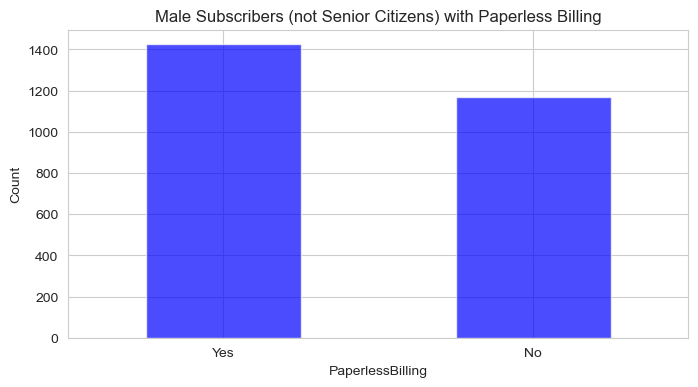

In [21]:
plt.figure(figsize=(8, 4))
male_not_senior_paperless.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Male Subscribers (not Senior Citizens) with Paperless Billing')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [67]:
# Scenario 2: Total Female Subscribers (not Senior Citizens) # 2,478
female_not_senior = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 0)]
female_not_senior

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [68]:
# a. Phone Service
female_not_senior_phone = female_not_senior['PhoneService'].value_counts()
female_not_senior_phone

Yes    2224
No      254
Name: PhoneService, dtype: int64

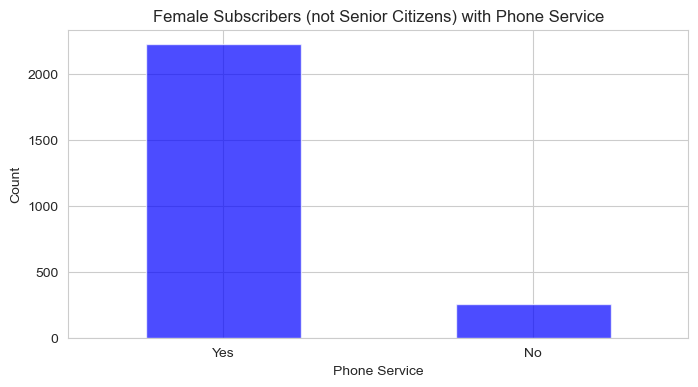

In [69]:
# Bar chart for Female Subscribers (not Senior Citizens) with Phone Service
plt.figure(figsize=(8, 4))
female_not_senior_phone.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Female Subscribers (not Senior Citizens) with Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [70]:
# b. Internet Service
female_not_senior_internet = female_not_senior['InternetService'].value_counts()
female_not_senior_internet

Fiber optic    954
DSL            909
No             615
Name: InternetService, dtype: int64

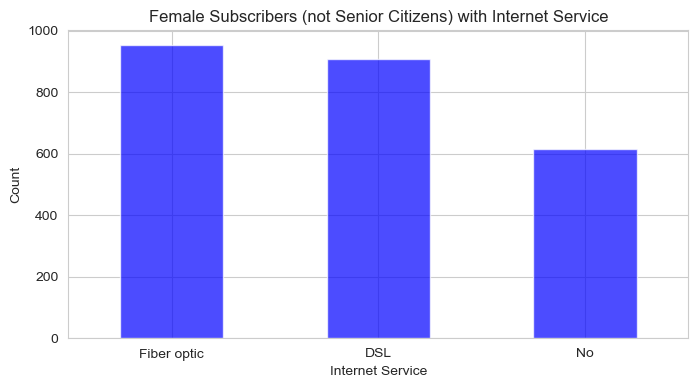

In [71]:
# Bar chart for Female Subscribers (not Senior Citizens) with Internet Service
plt.figure(figsize=(8, 4))
female_not_senior_internet.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Female Subscribers (not Senior Citizens) with Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [72]:
# c. Device Protection
female_not_senior_device = female_not_senior['DeviceProtection'].value_counts()
female_not_senior_device

No                     1046
Yes                     817
No internet service     615
Name: DeviceProtection, dtype: int64

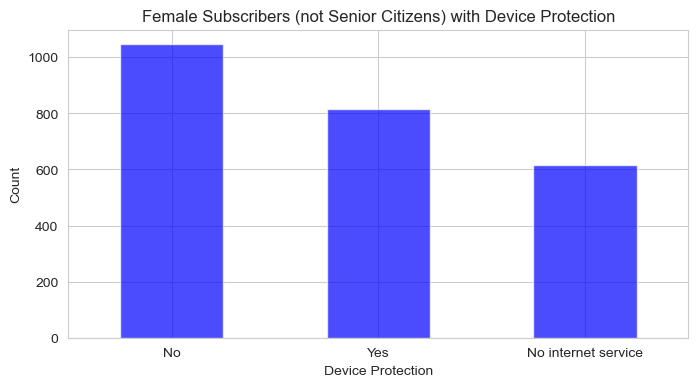

In [73]:
# Bar chart for Female Subscribers (not Senior Citizens) with Device Protection
plt.figure(figsize=(8, 4))
female_not_senior_device.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Female Subscribers (not Senior Citizens) with Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [74]:
# d. Streaming TV
female_not_senior_streaming = female_not_senior['StreamingTV'].value_counts()
female_not_senior_streaming

No                     956
Yes                    907
No internet service    615
Name: StreamingTV, dtype: int64

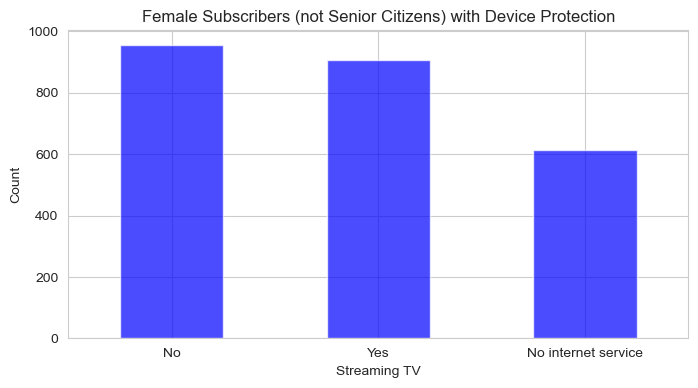

In [75]:
# Bar chart for Female Subscribers (not Senior Citizens) with Device Protection
plt.figure(figsize=(8, 4))
female_not_senior_streaming.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Female Subscribers (not Senior Citizens) with Device Protection')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [76]:
# e. Paperless billing
female_not_senior_paperless = female_not_senior['PaperlessBilling'].value_counts()
female_not_senior_paperless

Yes    1401
No     1077
Name: PaperlessBilling, dtype: int64

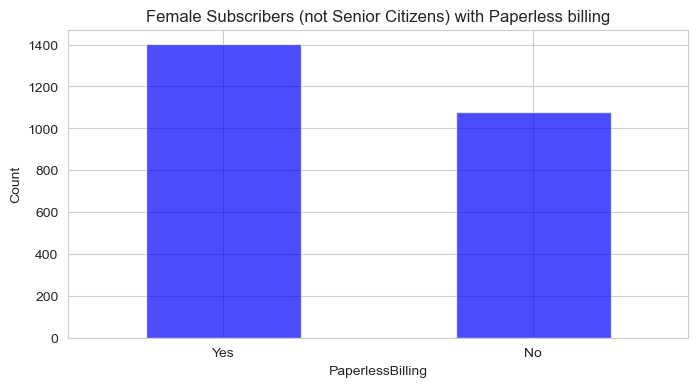

In [77]:
# Bar chart for Female Subscribers (not Senior Citizens) with Paperless billing
plt.figure(figsize=(8, 4))
female_not_senior_paperless.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Female Subscribers (not Senior Citizens) with Paperless billing')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [78]:
# Business Question: who is most likely to pay monthly fee or total fee of over certain amount? 
# How? logistic Regression & Decision Tree
# How to calculate a certain amount? => top 10 %

In [83]:
import pandas as pd

# Convert 'TotalCharges' to a numeric data type and handle missing values by filling them with the mean
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

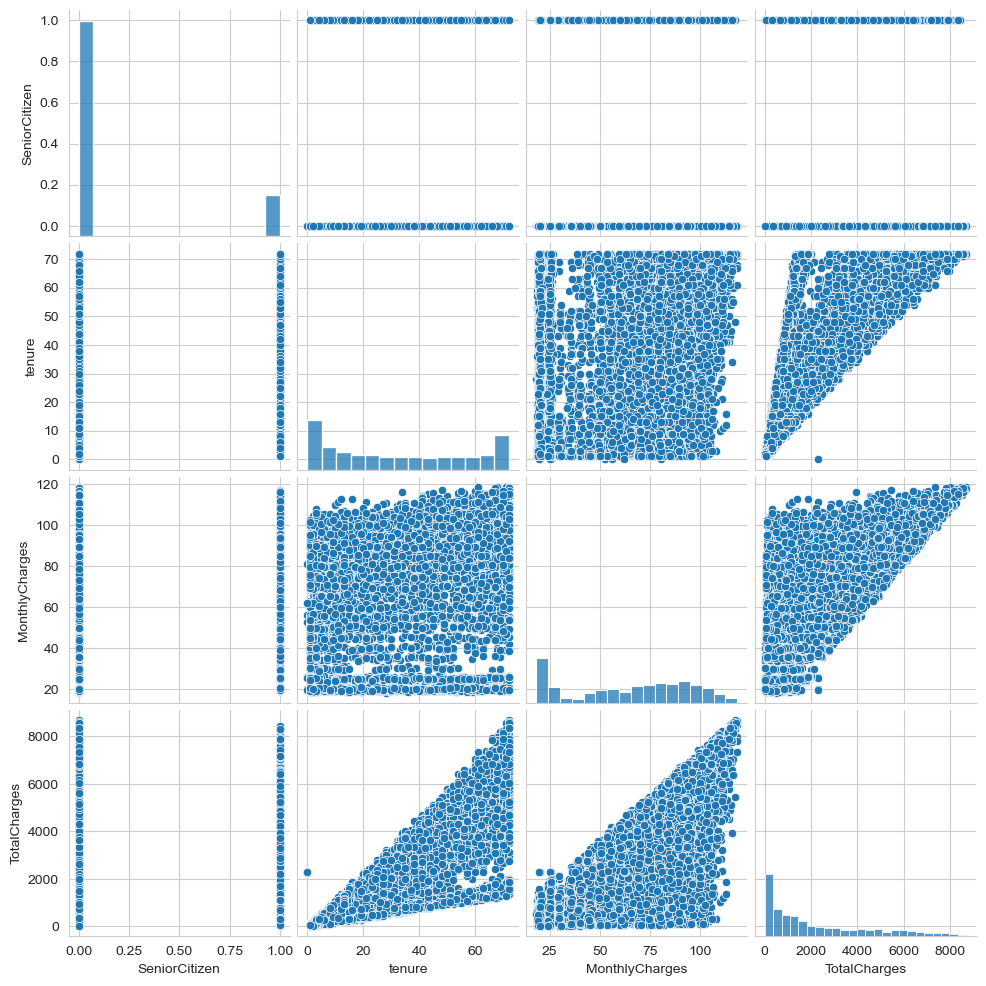

In [80]:
sns.pairplot(df)
plt.show()

In [81]:
# Calculate the correlation matrix
df.corr()

C:\Users\ziach\AppData\Local\Temp\ipykernel_8092\877677013.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.005980,0.221804,0.095342
tenure,0.005980,1.000000,0.254745,0.825359
MonthlyCharges,0.221804,0.254745,1.000000,0.655313
TotalCharges,0.095342,0.825359,0.655313,1.000000


In [44]:
import pandas as pd

# Assuming you have already read the dataset into a DataFrame as 'df'

# Define mapping dictionaries for each column
mapping_gender = {'Male': 0, 'Female':1}
mapping_partner_dependent = {'Yes': 1, 'No': 0}
mapping_multiple_lines = {'Yes': 1, 'No': 0, 'No phone service': 0}
mapping_internet_service = {'No': 0, 'Fiber optic': 1, 'DSL': 1}
mapping_security_backup_protection = {'Yes': 1, 'No': 0, 'No internet service': 0}
mapping_contract = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
mapping_payment_method = {
    'Credit card (automatic)': 0,
    'Bank transfer (automatic)': 1,
    'Electronic check': 2,
    'Mailed check': 3
}

# Apply the mapping to the respective columns
df['gender'] = df['gender'].replace(mapping_gender)
df['Partner'] = df['Partner'].replace(mapping_partner_dependent)
df['Dependents'] = df['Dependents'].replace(mapping_partner_dependent)
df['PhoneService'] = df['PhoneService'].replace(mapping_partner_dependent)
df['PaperlessBilling'] = df['PaperlessBilling'].replace(mapping_partner_dependent)
df['Churn'] = df['Churn'].replace(mapping_partner_dependent)

df['MultipleLines'] = df['MultipleLines'].replace(mapping_multiple_lines)
df['InternetService'] = df['InternetService'].replace(mapping_internet_service)

columns_to_map = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns_to_map:
    df[column] = df[column].replace(mapping_security_backup_protection)

df['Contract'] = df['Contract'].replace(mapping_contract)
df['PaymentMethod'] = df['PaymentMethod'].replace(mapping_payment_method)

# Now, the specified columns have been converted to their numeric representations as requested.


In [34]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,3,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,1,1,0,...,1,0,1,1,1,1,0,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,1,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [35]:
# Calculate the correlation matrix
correlation_matrix = df.corr().round(2)
correlation_matrix 

C:\Users\ziach\AppData\Local\Temp\ipykernel_29844\226209856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,0.01,0.01,-0.01,-0.01,0.00,-0.00,0.01,0.02,0.02,0.01,0.01,0.01,0.01,-0.00,0.02,-0.01,0.01,0.00,0.01
SeniorCitizen,0.01,1.00,0.02,-0.22,0.01,0.01,0.14,0.19,-0.04,0.06,0.06,-0.06,0.10,0.12,-0.15,0.15,-0.03,0.22,0.10,0.15
Partner,0.01,0.02,1.00,0.45,0.38,0.03,0.15,-0.00,0.15,0.15,0.15,0.12,0.13,0.12,0.30,-0.02,-0.15,0.10,0.32,-0.14
Dependents,-0.01,-0.22,0.45,1.00,0.16,0.00,-0.02,-0.14,0.08,0.02,0.01,0.07,-0.02,-0.04,0.25,-0.11,-0.05,-0.12,0.07,-0.16
tenure,-0.01,0.01,0.38,0.16,1.00,0.01,0.34,0.04,0.33,0.36,0.36,0.33,0.28,0.29,0.67,0.00,-0.36,0.25,0.83,-0.35
PhoneService,0.00,0.01,0.03,0.00,0.01,1.00,0.29,-0.17,-0.09,-0.05,-0.07,-0.09,-0.02,-0.03,0.01,0.02,0.01,0.25,0.12,0.01
MultipleLines,-0.00,0.14,0.15,-0.02,0.34,0.29,1.00,0.21,0.11,0.21,0.20,0.10,0.25,0.26,0.11,0.17,-0.16,0.49,0.48,0.04
InternetService,0.01,0.19,-0.00,-0.14,0.04,-0.17,0.21,1.00,0.33,0.38,0.38,0.33,0.41,0.42,-0.24,0.32,-0.13,0.76,0.37,0.22
OnlineSecurity,0.02,-0.04,0.15,0.08,0.33,-0.09,0.11,0.33,1.00,0.29,0.28,0.35,0.19,0.20,0.24,0.00,-0.16,0.30,0.42,-0.17
OnlineBackup,0.02,0.06,0.15,0.02,0.36,-0.05,0.21,0.38,0.29,1.00,0.31,0.29,0.28,0.28,0.15,0.12,-0.17,0.45,0.51,-0.08


C:\Users\ziach\AppData\Local\Temp\ipykernel_29844\2847515786.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


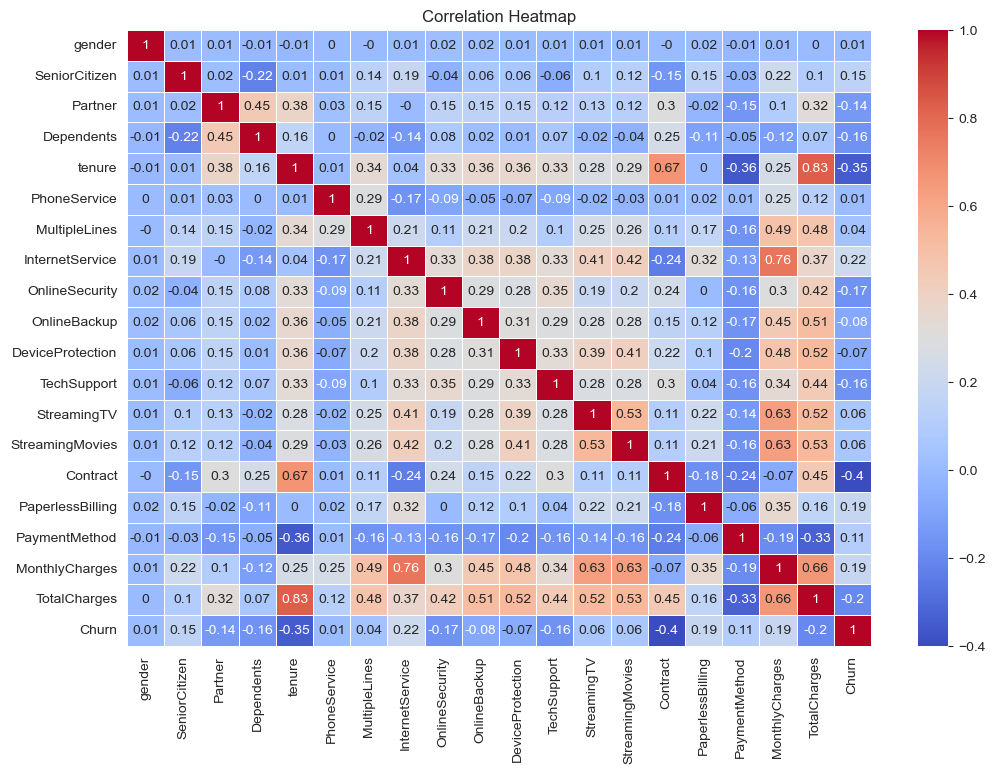

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the dataset into a DataFrame as 'df'

# Calculate the correlation matrix
correlation_matrix = df.corr().round(2)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


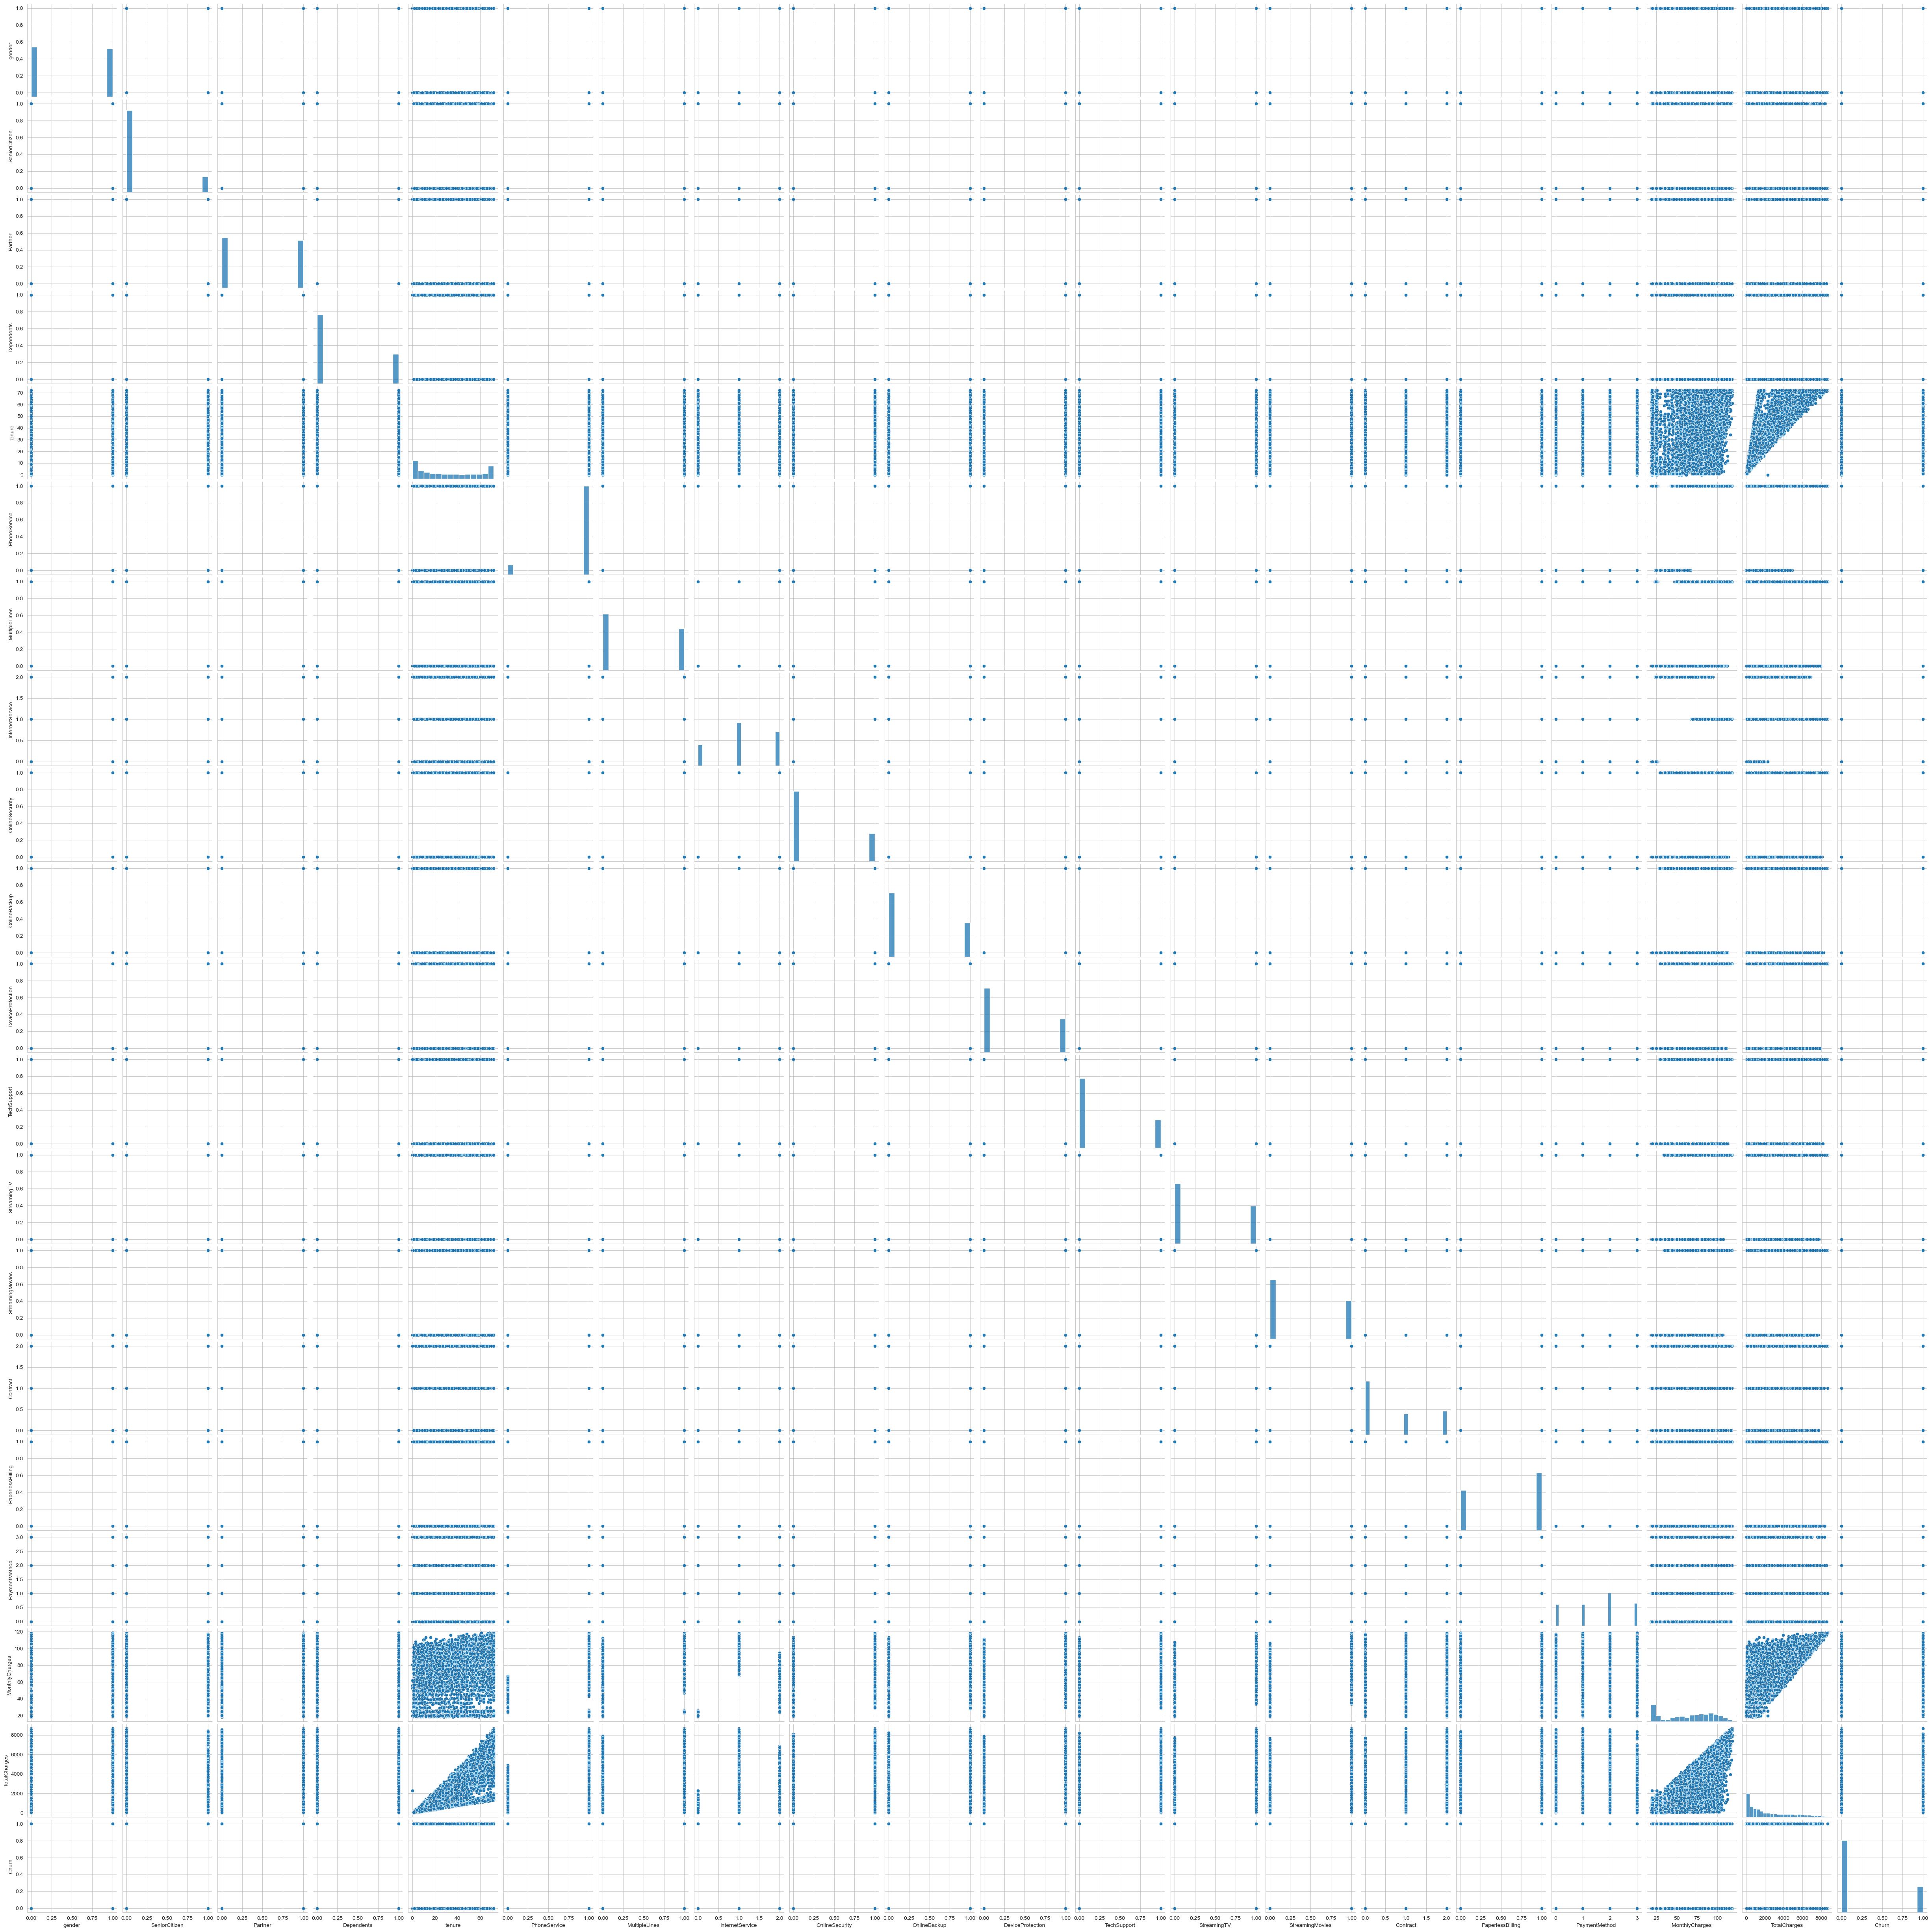

In [86]:
sns.pairplot(df)
plt.show()

In [38]:
# Extract the correlation values of all features with 'Churn'
correlation_with_churn = correlation_matrix['Churn']

# Sort the features by their correlation values (in descending order)
sorted_correlations = correlation_with_churn.abs().sort_values(ascending=False)

# Print the sorted correlations
print(sorted_correlations)

# Select features with strong correlations (you can set a correlation threshold)
strong_correlation_threshold = 0.1  # You can adjust this threshold as needed
selected_features = sorted_correlations[sorted_correlations >= strong_correlation_threshold].index.tolist()

# Print the selected features
print("Selected Features:")
print(selected_features)

Churn               1.00
Contract            0.40
tenure              0.35
InternetService     0.22
TotalCharges        0.20
MonthlyCharges      0.19
PaperlessBilling    0.19
OnlineSecurity      0.17
Dependents          0.16
TechSupport         0.16
SeniorCitizen       0.15
Partner             0.14
PaymentMethod       0.11
OnlineBackup        0.08
DeviceProtection    0.07
StreamingMovies     0.06
StreamingTV         0.06
MultipleLines       0.04
PhoneService        0.01
gender              0.01
Name: Churn, dtype: float64
Selected Features:
['Churn', 'Contract', 'tenure', 'InternetService', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'OnlineSecurity', 'Dependents', 'TechSupport', 'SeniorCitizen', 'Partner', 'PaymentMethod']


# Model Building
Use the insights gained from the correlation analysis and visualization to build predictive models for churn prediction. Starting with simple models like logistic regression and then explore more complex models like decision trees, random forests, or neural networks.

# 1. Data Preparation:
Before building the models, you need to prepare your data. Ensuring already handled any missing values, converted categorical variables into numerical format (e.g., one-hot encoding for categorical variables), and split the data into training and testing sets.

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Exclude the "customerID" column from the features
features = df.drop(columns=['customerID'])

# Define the target variable
target = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training data, while X_test and y_test contain the testing data.

# 2. Model 1: Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
logistic_regression_predictions = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, logistic_regression_predictions)
confusion_matrix_lr = confusion_matrix(y_test, logistic_regression_predictions)
classification_report_lr = classification_report(y_test, logistic_regression_predictions)

# Print the results
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_lr)
print("Classification Report:")
print(classification_report_lr)

Logistic Regression Model Results:
Accuracy: 1.00
Confusion Matrix:
[[884   0]
 [  2 324]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      0.99      1.00       326

    accuracy                           1.00      1210
   macro avg       1.00      1.00      1.00      1210
weighted avg       1.00      1.00      1.00      1210



C:\Users\ziach\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
import pandas as pd

# Check the class distribution for the "Churn" column
class_distribution = df['Churn'].value_counts()

# Print the class distribution
print(class_distribution)

# Class "0" has 4,444 instances.
# Class "1" has 1,606 instances.

0    4444
1    1606
Name: Churn, dtype: int64


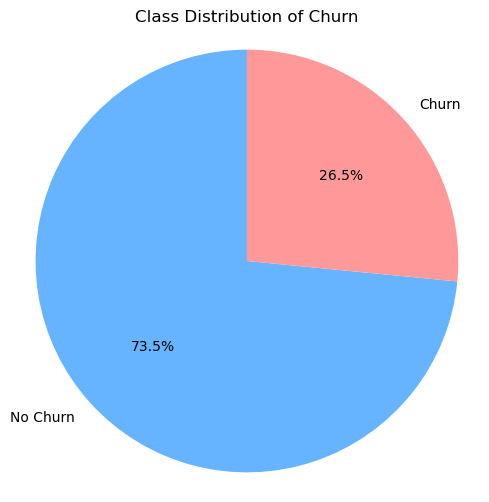

In [1]:
import matplotlib.pyplot as plt

# Define the class distribution
class_distribution = [4444, 1606]  # Replace with your actual counts

# Define class labels
labels = ['No Churn', 'Churn']

# Define colors for the pie chart
colors = ['#66b3ff', '#ff9999']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Class Distribution of Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [94]:
from sklearn.linear_model import LogisticRegression

In [64]:
X = df['Contract'].values.reshape(-1, 1)  # A hack you have to do when you have one independent variable
y = df['Churn']

In [65]:
df_model = linear_model.LogisticRegression(solver='liblinear') # Creating model object
df_model.fit(X, y)

LogisticRegression(solver='liblinear')

In [66]:
df_model.coef_ # This is the B1

array([[-1.66404876]])

In [67]:
df_model.intercept_ # This is the B0

array([-0.29627914])

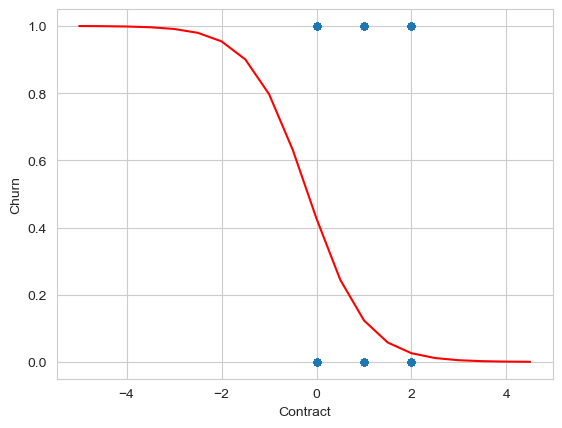

In [110]:
df_data = df[['Contract', 'Churn']]
df_data.plot.scatter("Contract", "Churn")

# plot the predicted probability:
plt.plot(np.arange(-5, 5, .5), df_model.predict_proba(np.arange(-5, 5, .5).reshape(-1, 1))[:, 1], color='red');

In [72]:
X = df['tenure'].values.reshape(-1, 1)  # Annoying hack you have to do when you have one independent variable
y = df['Churn']

In [54]:
df_model = linear_model.LogisticRegression(solver='liblinear') # Creating model object
df_model.fit(X, y)

LogisticRegression(solver='liblinear')

In [55]:
df_model.coef_ # This is the B1

array([[-0.03815194]])

In [56]:
df_model.intercept_ # This is the B0

array([0.01919713])

In [77]:
Xnew = np.arange(-30, 30).reshape(-1, 1) # Create a new data
df_model.predict(Xnew)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
df_model.predict_proba(Xnew) # the first row is correspoding to 0 in the above array
# [Probability of getting 0, and 1] = adds up it's 1
# We can see the coefficients that were fit by accessing the `.intercept_` and `.coef_` attributes of the fitted model. 

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [8.88178420e-16, 1.00000000e+00],
       [4.66293670e-15, 1.00000000e+00],
       [2.50910404e-14, 1.00000000e+00],
       [1.31894495e-13, 1.00000000e+00],
       [6.96553926e-13, 1.00000000e+00],
       [3.67861297e-12, 1.00000000e+00],
       [1.94251282e-11, 1.00000000e+00],
       [1.02577502e-10, 1.00000000e+00],
       [5.41675149e-10, 9.99999999e-01],
       [2.86039548e-09, 9.99999997e-01],
       [1.51047408e-08, 9.99999985e-01],
       [7.97628089e-08, 9.99999920e-01],
       [4.21199147e-07, 9.99999579e-01],
       [2.22420029e-06, 9.99997776e-01],
       [1.17451062e-05, 9.99988255e-01],
       [6.201864

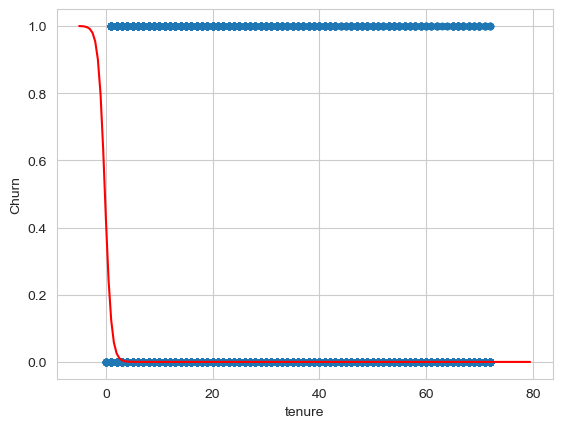

In [97]:
df_data = df[['tenure', 'Churn']]
df_data.plot.scatter("tenure", "Churn")

# plot the predicted probability:
plt.plot(np.arange(-5, 80, .5), df_model.predict_proba(np.arange(-5, 80, .5).reshape(-1, 1))[:, 1], color='red');

# 3. Model 2: Decision Tree

In [117]:
from sklearn import tree

df_tree = tree.DecisionTreeClassifier(max_depth=5) # try changing the depth 
df_tree.fit(X, y)
df_tree.score(X, y) # what do you think score is calculating? data scored based on the historical data, 예전 데이터로 트레이닝하고 예전데이터로 예측함. 별 쓸모없음

0.7345454545454545

C:\Users\ziach\AppData\Local\Temp\ipykernel_29844\1343813044.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['TotalCharges'] = imputer.fit_transform(features['TotalCharges'].values.reshape(-1, 1))
C:\Users\ziach\AppData\Local\Temp\ipykernel_29844\1343813044.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = encoder.fit_transform(features[col])
C:\Users\ziach\AppData\Local\Temp\ipykernel_29844\1343813044.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

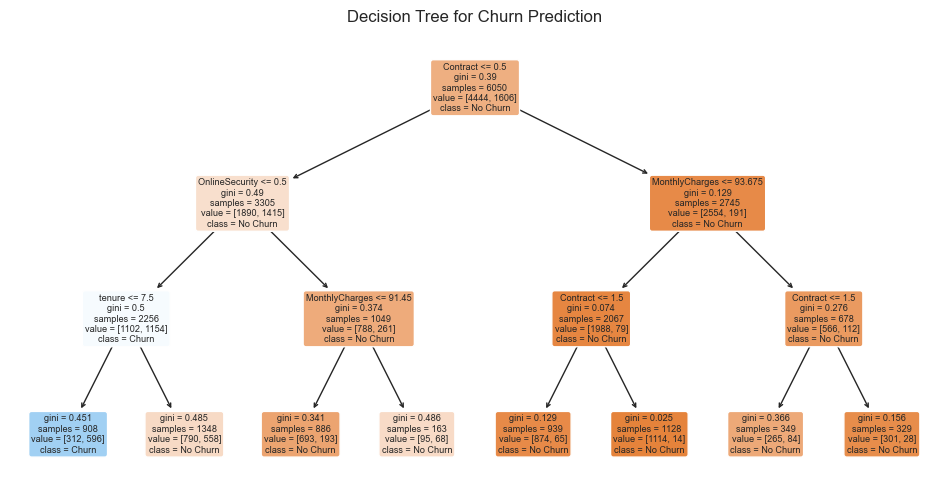

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming you have already read the dataset into a DataFrame as 'df'

# Convert 'TotalCharges' column to numeric (and handle errors by setting them to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Select a subset of features (you can customize this)
features = df[['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling', 'OnlineSecurity']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features['TotalCharges'] = imputer.fit_transform(features['TotalCharges'].values.reshape(-1, 1))

# Encode categorical features
encoder = LabelEncoder()
categorical_columns = ['Contract', 'PaperlessBilling', 'OnlineSecurity']
for col in categorical_columns:
    features[col] = encoder.fit_transform(features[col])

# Define the target variable
target = df['Churn']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)  # You can adjust the max_depth as needed

# Fit the model on the data
clf.fit(features, target)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=features.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.title("Decision Tree for Churn Prediction")
plt.show()


# 4. Model 3: Random Forest

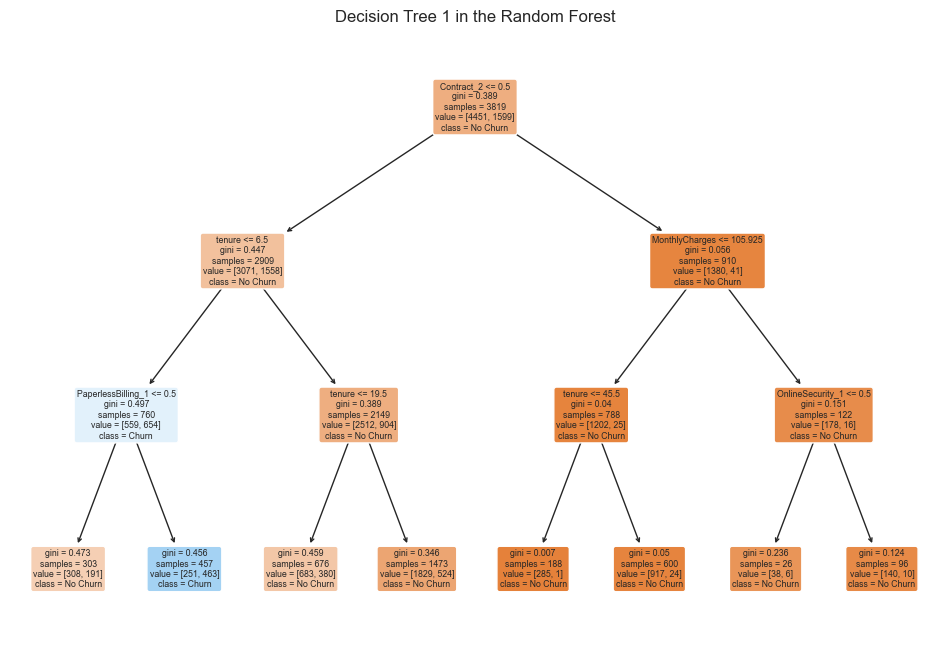

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already read the dataset into a DataFrame as 'df'

# Select a subset of features (you can customize this)
features = df[['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling', 'OnlineSecurity']]

# Define the target variable
target = df['Churn']

# Convert categorical features to numeric using one-hot encoding
features = pd.get_dummies(features, columns=['Contract', 'PaperlessBilling', 'OnlineSecurity'], drop_first=True)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # You can adjust the parameters as needed

# Fit the model on the data
clf.fit(features, target)

# Plot the decision trees in the Random Forest
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
tree_idx = 0  # Index of the tree you want to visualize (you can change this)

# Visualize the selected tree
plot_tree(clf.estimators_[tree_idx], feature_names=features.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.title(f"Decision Tree {tree_idx + 1} in the Random Forest")
plt.show()


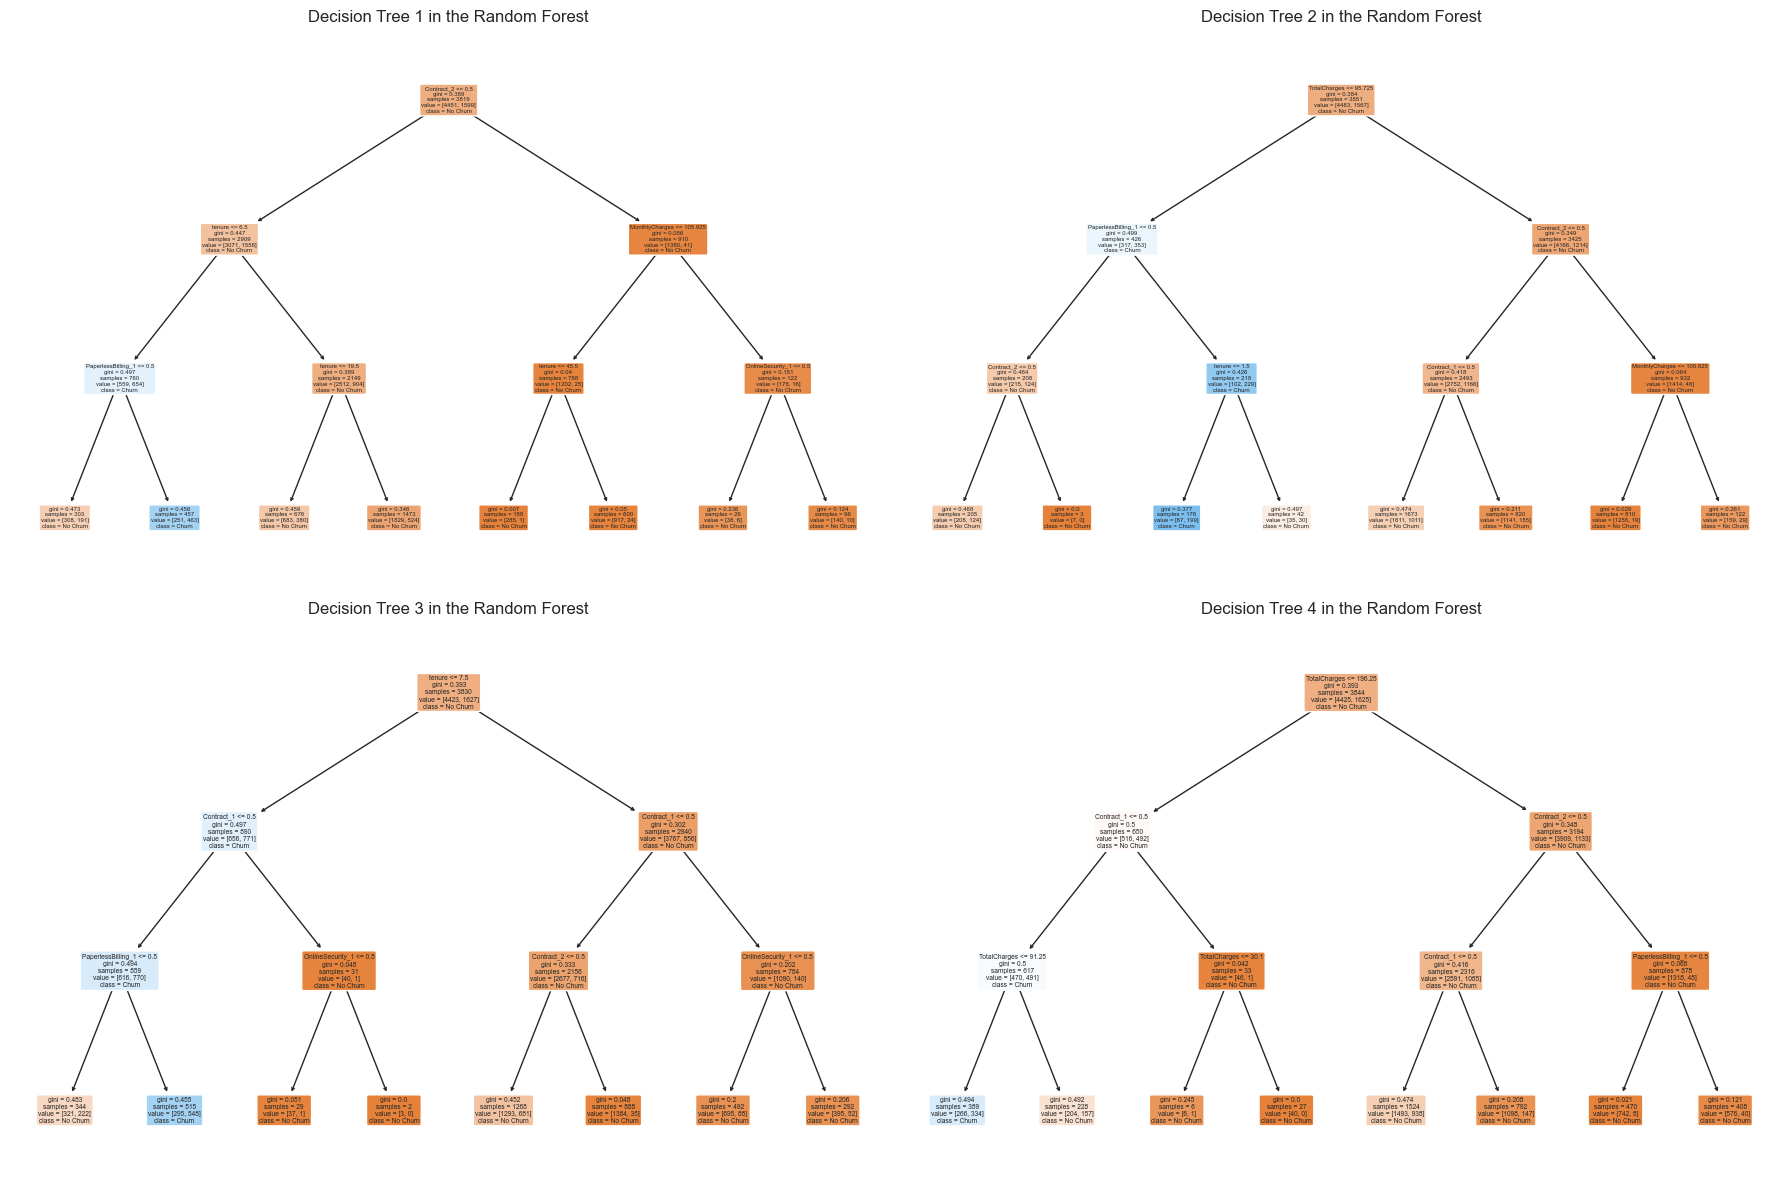

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already read the dataset into a DataFrame as 'df'

# Select a subset of features (you can customize this)
features = df[['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling', 'OnlineSecurity']]

# Define the target variable
target = df['Churn']

# Convert categorical features to numeric using one-hot encoding
features = pd.get_dummies(features, columns=['Contract', 'PaperlessBilling', 'OnlineSecurity'], drop_first=True)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # You can adjust the parameters as needed

# Fit the model on the data
clf.fit(features, target)

# Plot the decision trees in the Random Forest
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))  # Create a 2x2 grid of subplots

for tree_idx in range(4):  # Visualize four decision trees
    row = tree_idx // 2  # Determine the row of the subplot
    col = tree_idx % 2   # Determine the column of the subplot
    
    # Visualize the selected tree
    plot_tree(clf.estimators_[tree_idx], feature_names=features.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, ax=axes[row, col])
    axes[row, col].set_title(f"Decision Tree {tree_idx + 1} in the Random Forest")

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


# 5. Model 4: Gradient Boosting
Finally, let's explore a Gradient Boosting model:

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, gradient_boosting_predictions)
confusion_matrix_gb = confusion_matrix(y_test, gradient_boosting_predictions)
classification_report_gb = classification_report(y_test, gradient_boosting_predictions)

# Print the results
print("\nGradient Boosting Model Results:")
print(f"Accuracy: {accuracy_gb:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_gb)
print("Classification Report:")
print(classification_report_gb)



Gradient Boosting Model Results:
Accuracy: 1.00
Confusion Matrix:
[[884   0]
 [  0 326]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       326

    accuracy                           1.00      1210
   macro avg       1.00      1.00      1.00      1210
weighted avg       1.00      1.00      1.00      1210



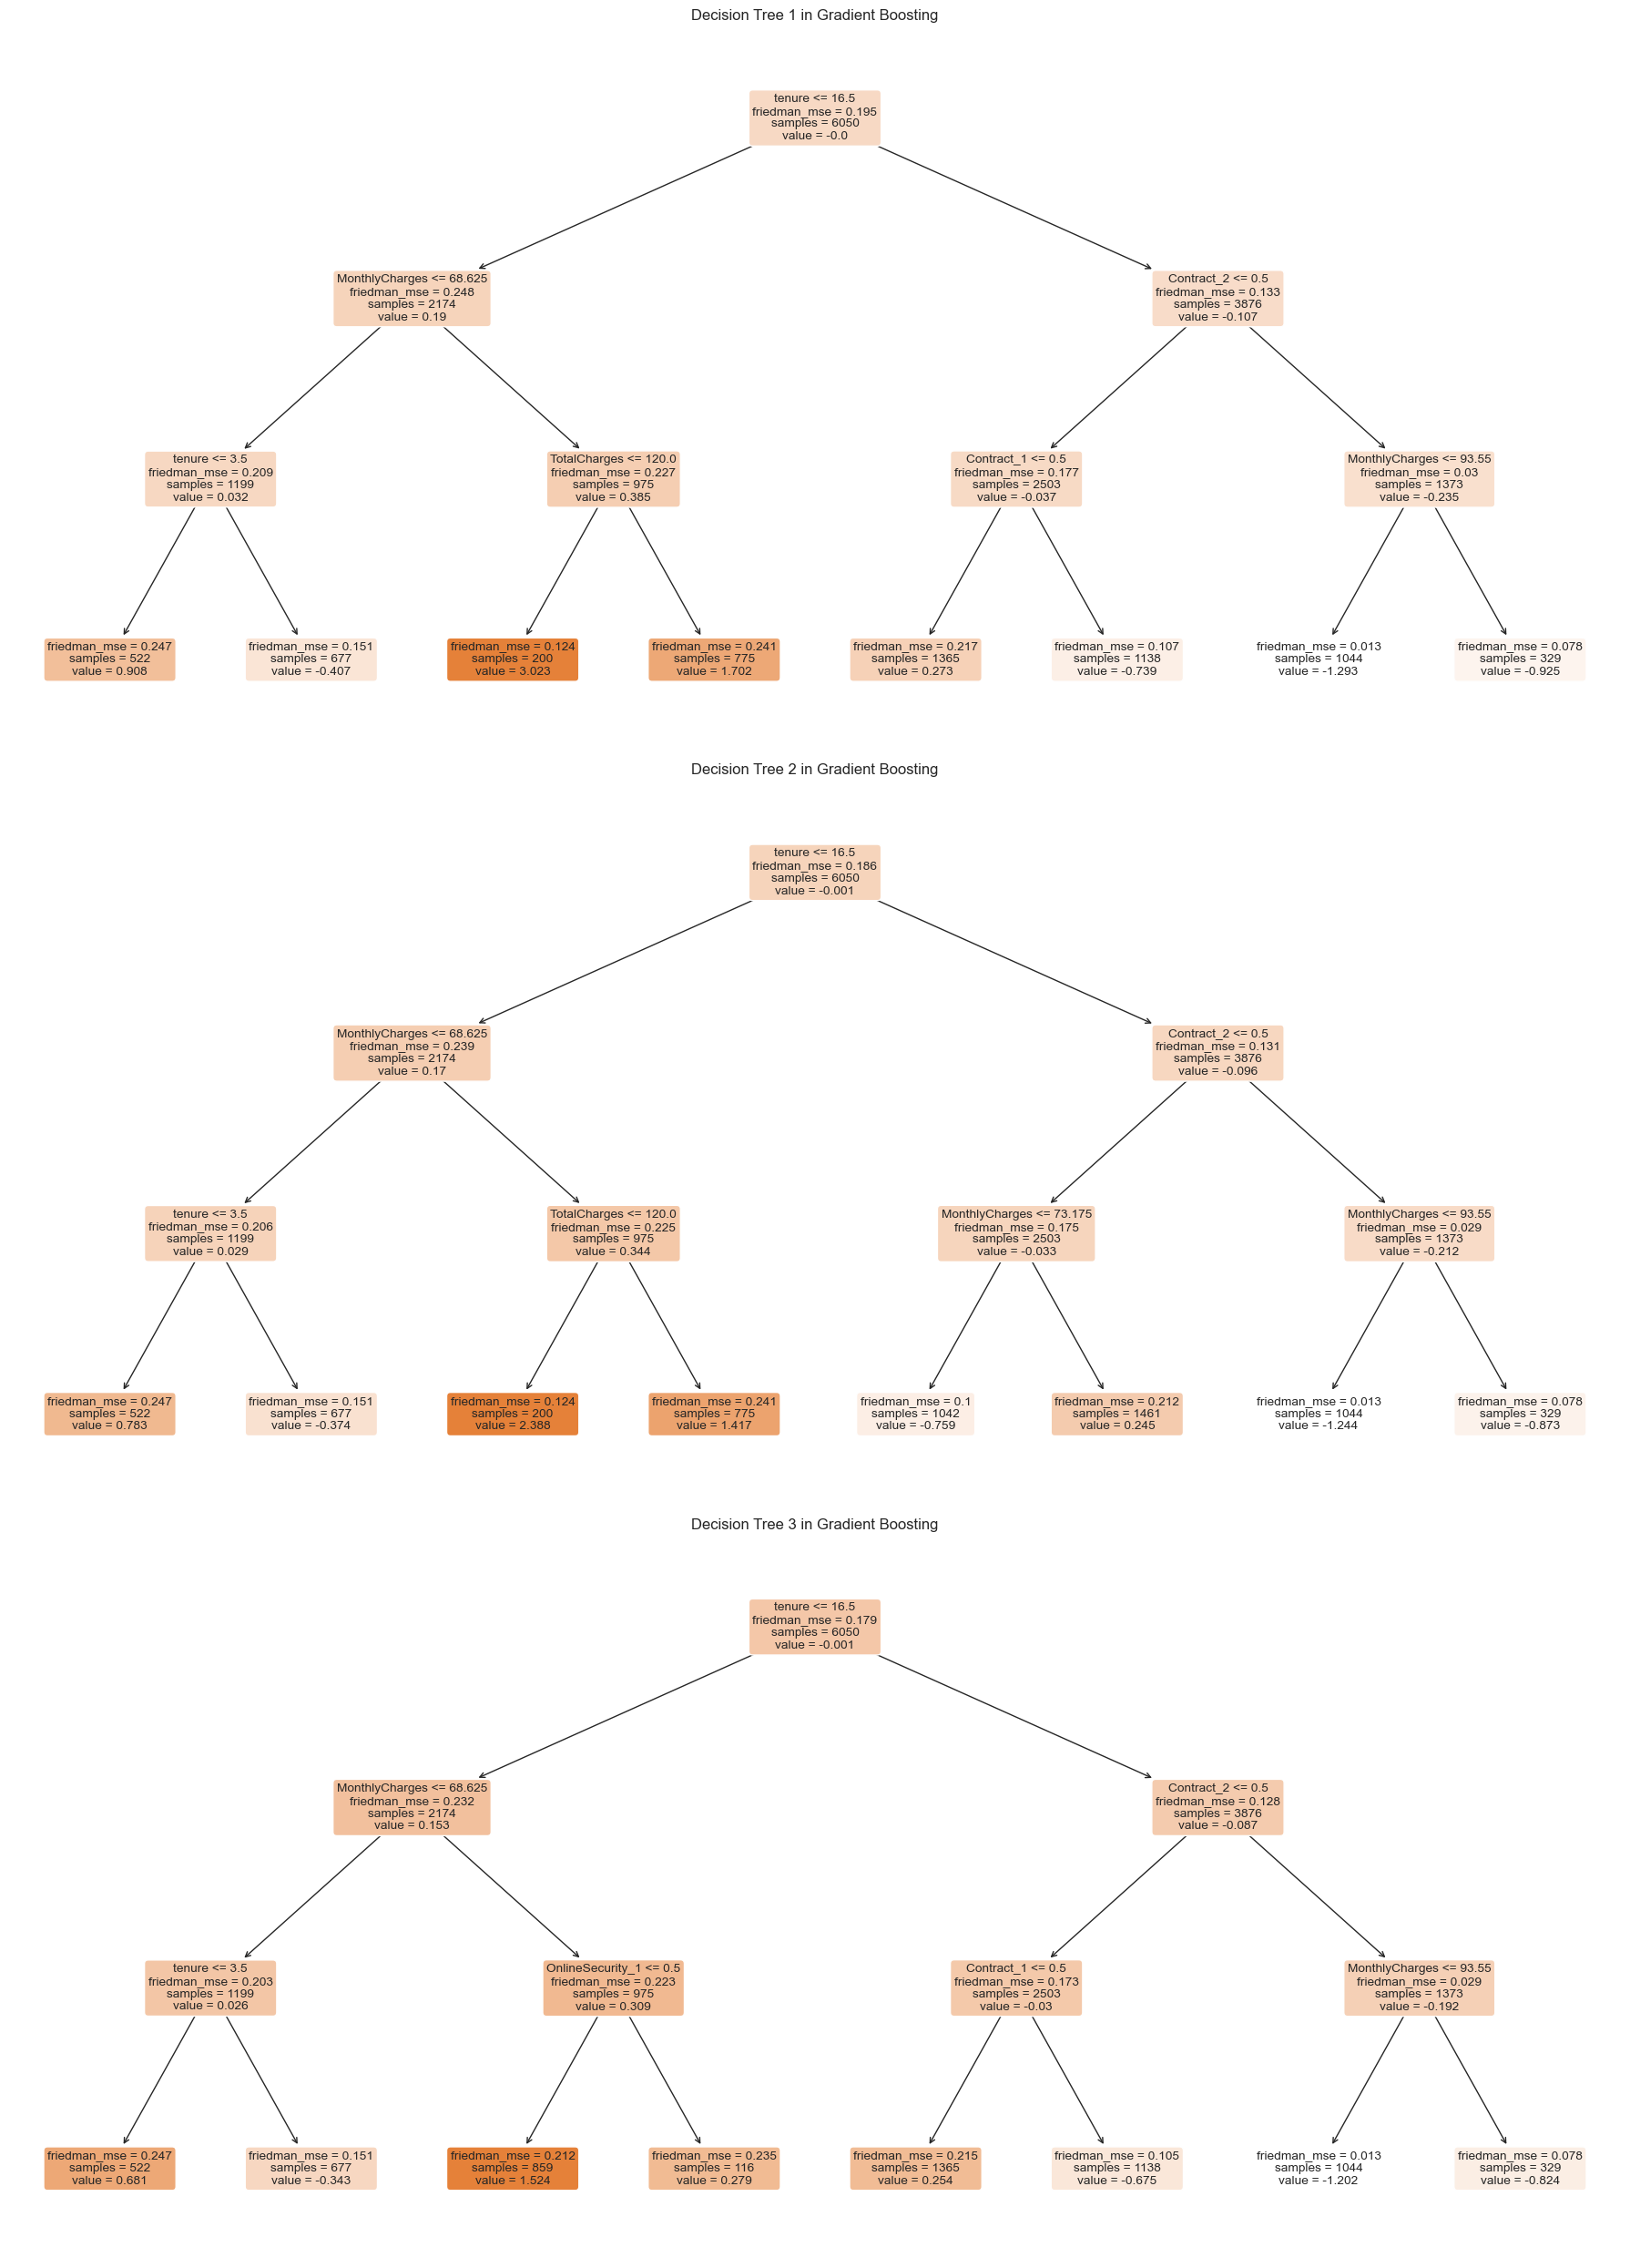

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

# Assuming you have already read the dataset into a DataFrame as 'df'

# Select a subset of features (you can customize this)
features = df[['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling', 'OnlineSecurity']]

# Define the target variable
target = df['Churn']

# Convert categorical features to numeric using one-hot encoding
features = pd.get_dummies(features, columns=['Contract', 'PaperlessBilling', 'OnlineSecurity'], drop_first=True)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=3, max_depth=3, random_state=42)  # You can adjust the parameters as needed

# Fit the model on the data
clf.fit(features, target)

# Plot the decision trees in the Gradient Boosting model
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 25))  # Create a 3x1 grid of subplots

for tree_idx, ax in enumerate(axes):  # Visualize each decision tree
    plot_tree(clf.estimators_[tree_idx][0], feature_names=features.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, ax=ax)
    ax.set_title(f"Decision Tree {tree_idx + 1} in Gradient Boosting")

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()
